In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset
test_df = pd.read_csv("data/raw/test.csv")
train_df = pd.read_csv("data/raw/train.csv")

print("Shape of train data set", train_df.shape)

Shape of train data set (1460, 81)


In [3]:
# inspect data frame
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 1000x900 with 0 Axes>

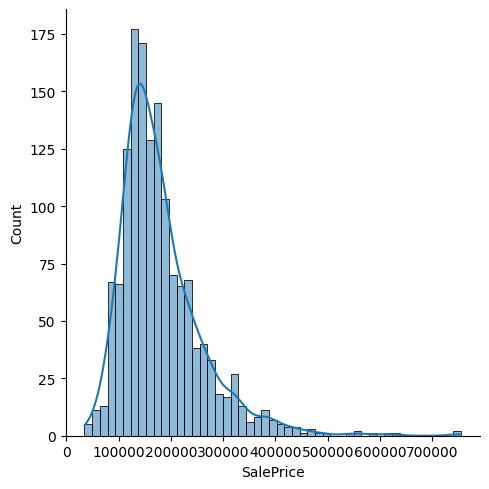

In [5]:
# We want to predict the house prices. Inspecting the feature:
print(train_df["SalePrice"].describe())
plt.figure(figsize=(10, 9))
sns.displot(train_df['SalePrice'], kde=True)

In [6]:
# Removing irrelevant types
print(list(set(train_df.dtypes.tolist())))

train_df_num = train_df.select_dtypes(include=["float64", "int64"])
print("Original df shape", train_df.shape)
print("Number df shape", train_df_num.shape)
train_df_num.head()

[dtype('float64'), dtype('int64'), dtype('O')]
Original df shape (1460, 81)
Number df shape (1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

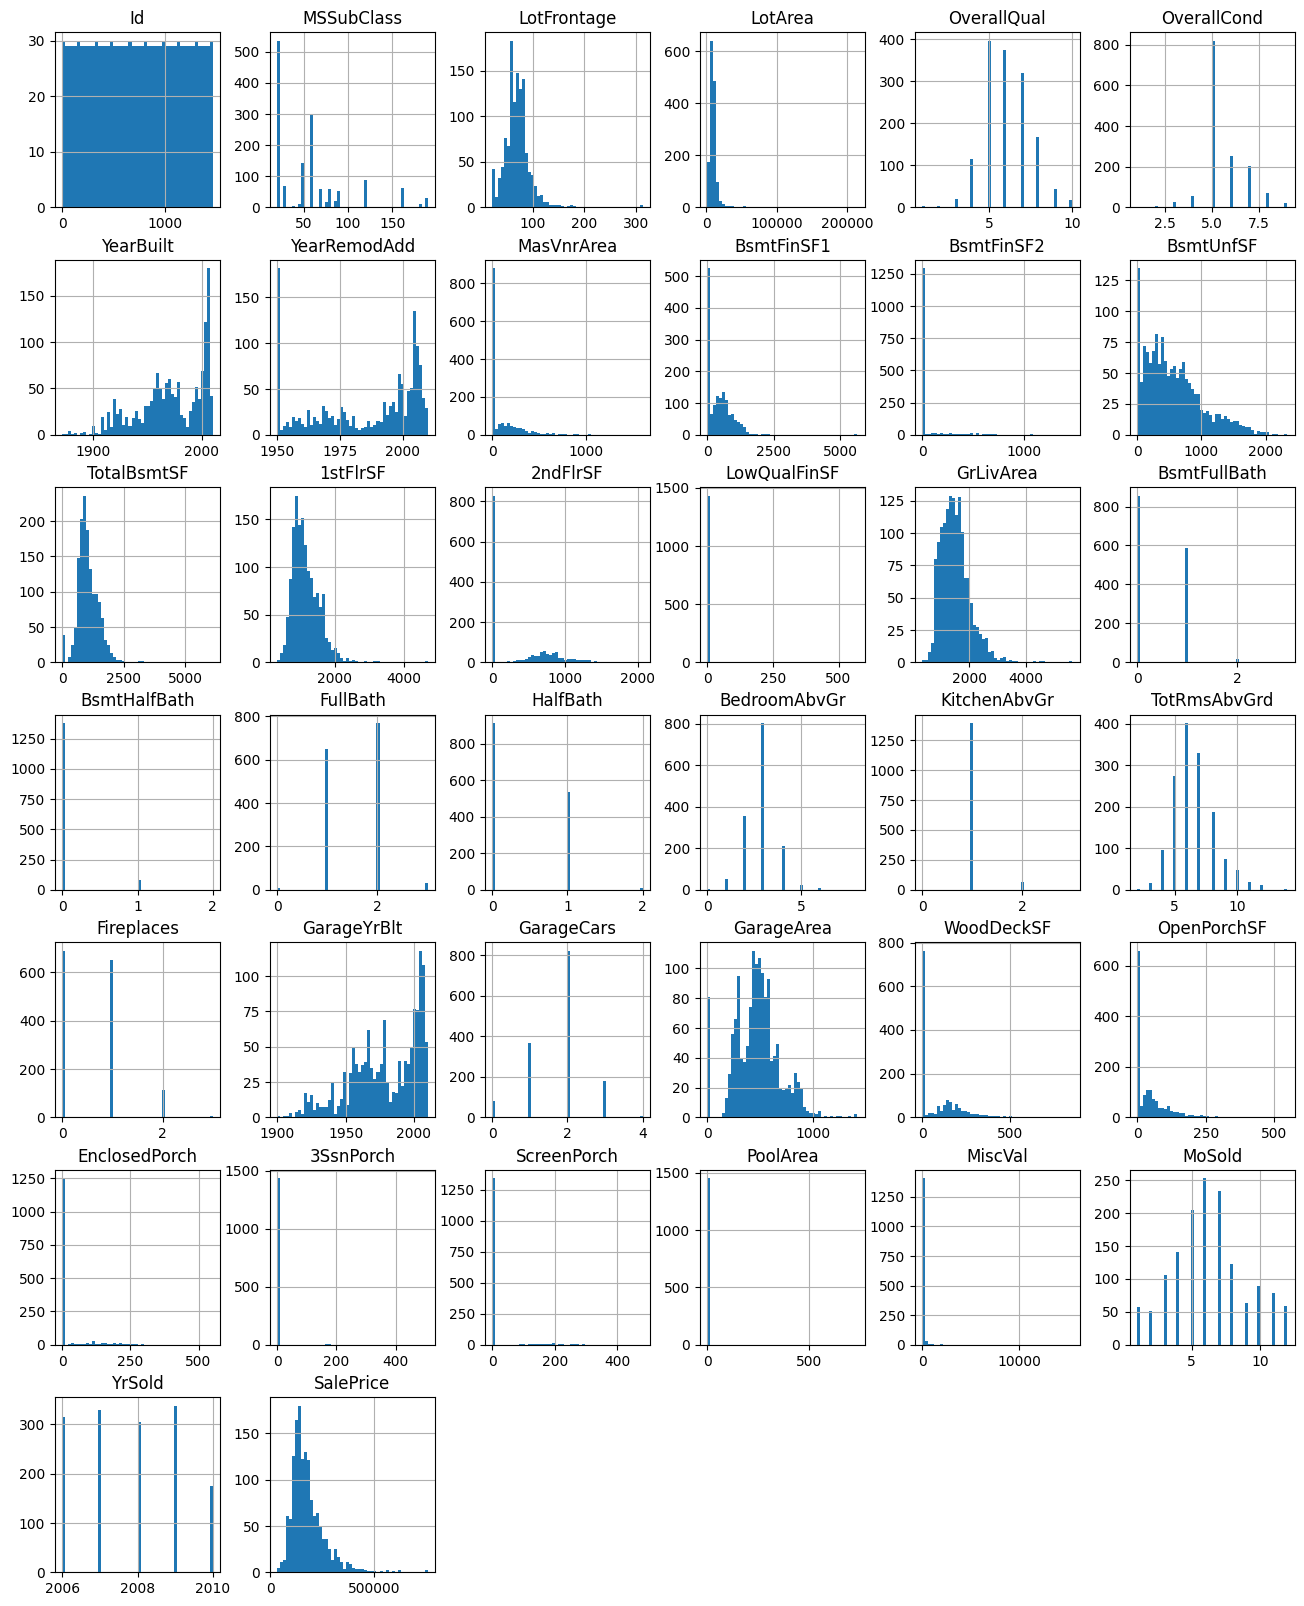

In [7]:
train_df_num.hist(figsize=(16,20), bins=50)

In [8]:
# Since there is a correlation between features, lets calculate the correlation
correlations = train_df_num.corrwith(train_df_num["SalePrice"]).sort_values()
top_correlations = correlations[-11:-1]
print(top_correlations)

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
dtype: float64


In [9]:
# prepare the data
from sklearn.model_selection import train_test_split

numeric_features = train_df_num.drop(columns=["SalePrice"])
numeric_features_filled = numeric_features.fillna(numeric_features.median())

X_selected = numeric_features_filled[top_correlations.keys()]
X_full = numeric_features_filled

y = train_df_num["SalePrice"]

(
    X_train,
    X_test,
    X_train_full,
    X_test_full,
    y_train,
    y_test,
) = train_test_split(
    X_selected,
    X_full,
    y,
    test_size=0.2,
    random_state=42,
)

print("Selected feature shape:", X_train.shape)
print("Full feature shape:", X_train_full.shape)

Selected feature shape: (1168, 10)
Full feature shape: (1168, 37)


MAE: 24774.219519604823
R^2: 0.7968483304281094


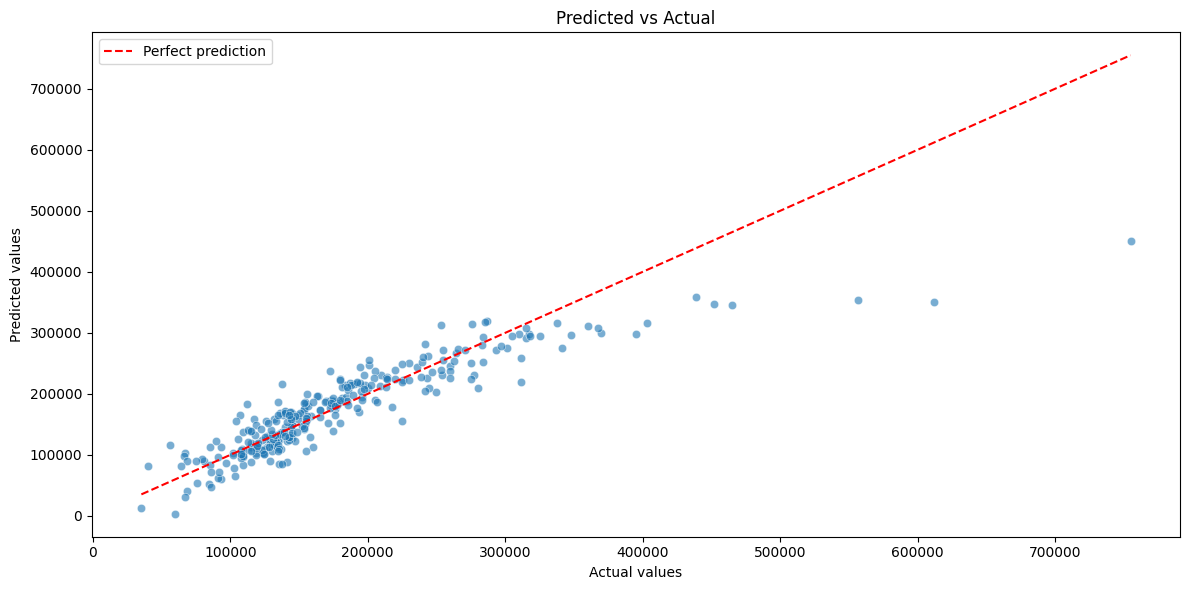

In [10]:
# Starting with a simple regression as a baseline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(
    x=y_test, y=y_test,
    color="red", linestyle="--", label="Perfect prediction"
)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.legend()
plt.tight_layout()
plt.show()


MAE: 18804.899601272013
R^2: 0.8859962247369862


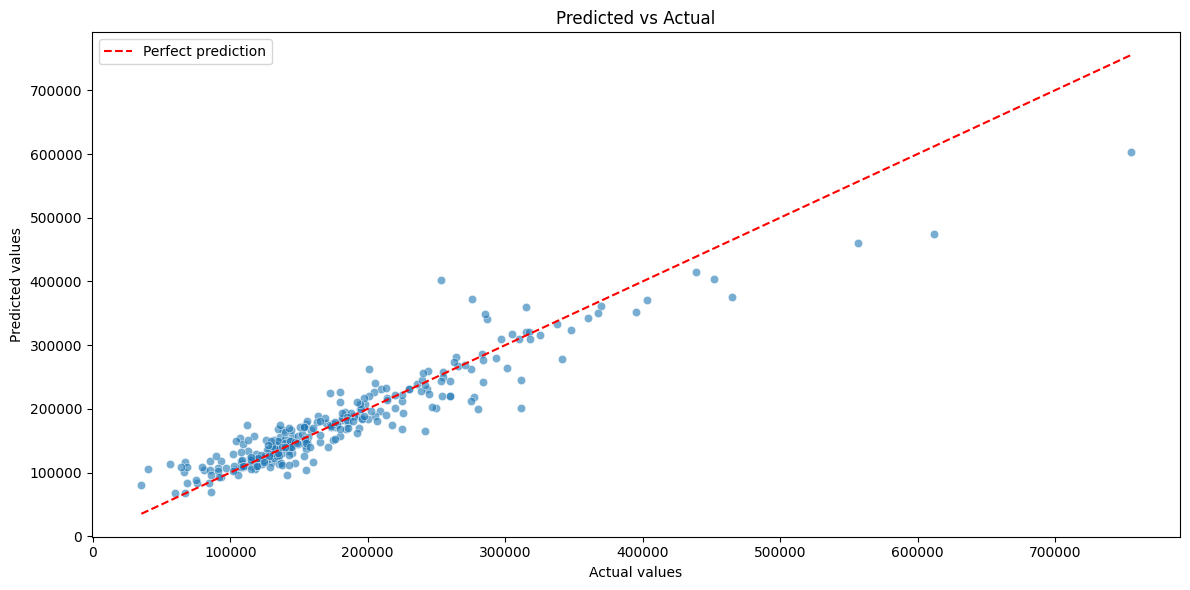

In [11]:
# Random forest and comparing it against our regression result
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_forest_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_forest_pred))
print("R^2:", r2_score(y_test, y_forest_pred))
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_forest_pred, alpha=0.6)
sns.lineplot(
    x=y_test, y=y_test,
    color="red", linestyle="--", label="Perfect prediction"
)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.legend()
plt.tight_layout()
plt.show()


Neural Network MAE: 24337.130552874212
Neural Network R^2: 0.8213943888683845


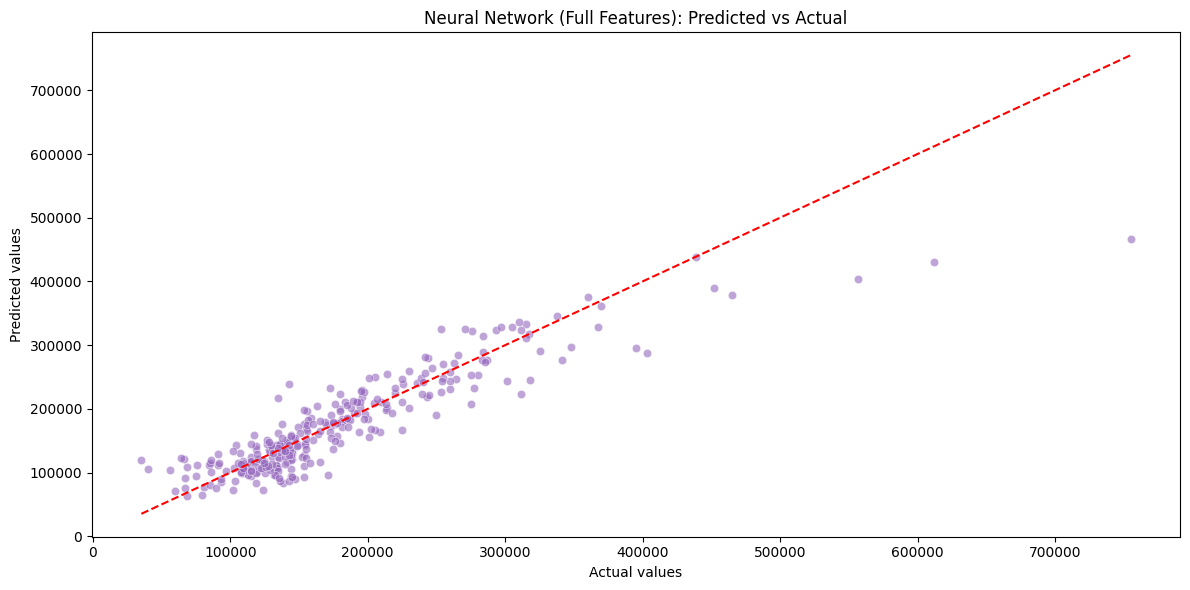

In [12]:
# Neural network regressor for comparison purposes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

nn_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "nn",
            MLPRegressor(
                hidden_layer_sizes=(128, 64),
                activation="relu",
                random_state=42,
                max_iter=3000,
                early_stopping=True,
            ),
        ),
    ]
)

nn_pipeline.fit(X_train_full, y_train)
y_nn_pred = nn_pipeline.predict(X_test_full)

print("Neural Network MAE:", mean_absolute_error(y_test, y_nn_pred))
print("Neural Network R^2:", r2_score(y_test, y_nn_pred))

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_nn_pred, alpha=0.6, color="tab:purple")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Neural Network (Full Features): Predicted vs Actual")
plt.tight_layout()
plt.show()

Deep Neural Network MAE: 21028.50390625
Deep Neural Network R^2: 0.8509222269058228


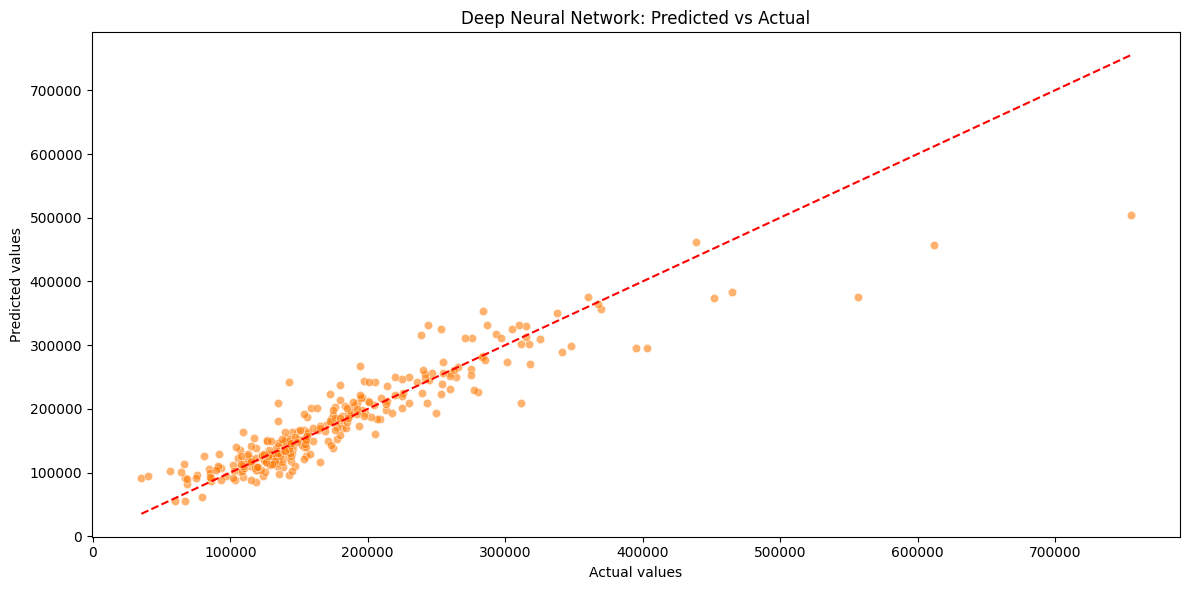

In [13]:
# Deep learning attempt with PyTorch
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)

scaler_dnn = StandardScaler()
X_train_scaled = scaler_dnn.fit_transform(X_train_full)
X_test_scaled = scaler_dnn.transform(X_test_full)

train_dataset = TensorDataset(
    torch.from_numpy(X_train_scaled).float(),
    torch.from_numpy(y_train.values).float().unsqueeze(1),
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class PriceRegressor(nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.network(x)

input_dim = X_train_full.shape[1]
dnn_model = PriceRegressor(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=1e-3)

epochs = 400
for epoch in range(epochs):
    dnn_model.train()
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()
        preds = dnn_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

dnn_model.eval()
with torch.no_grad():
    y_dnn_pred = (
        dnn_model(torch.from_numpy(X_test_scaled).float().to(device))
        .cpu()
        .numpy()
        .ravel()
    )

print("Deep Neural Network MAE:", mean_absolute_error(y_test, y_dnn_pred))
print("Deep Neural Network R^2:", r2_score(y_test, y_dnn_pred))

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_dnn_pred, alpha=0.6, color="tab:orange")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep Neural Network: Predicted vs Actual")
plt.tight_layout()
plt.show()

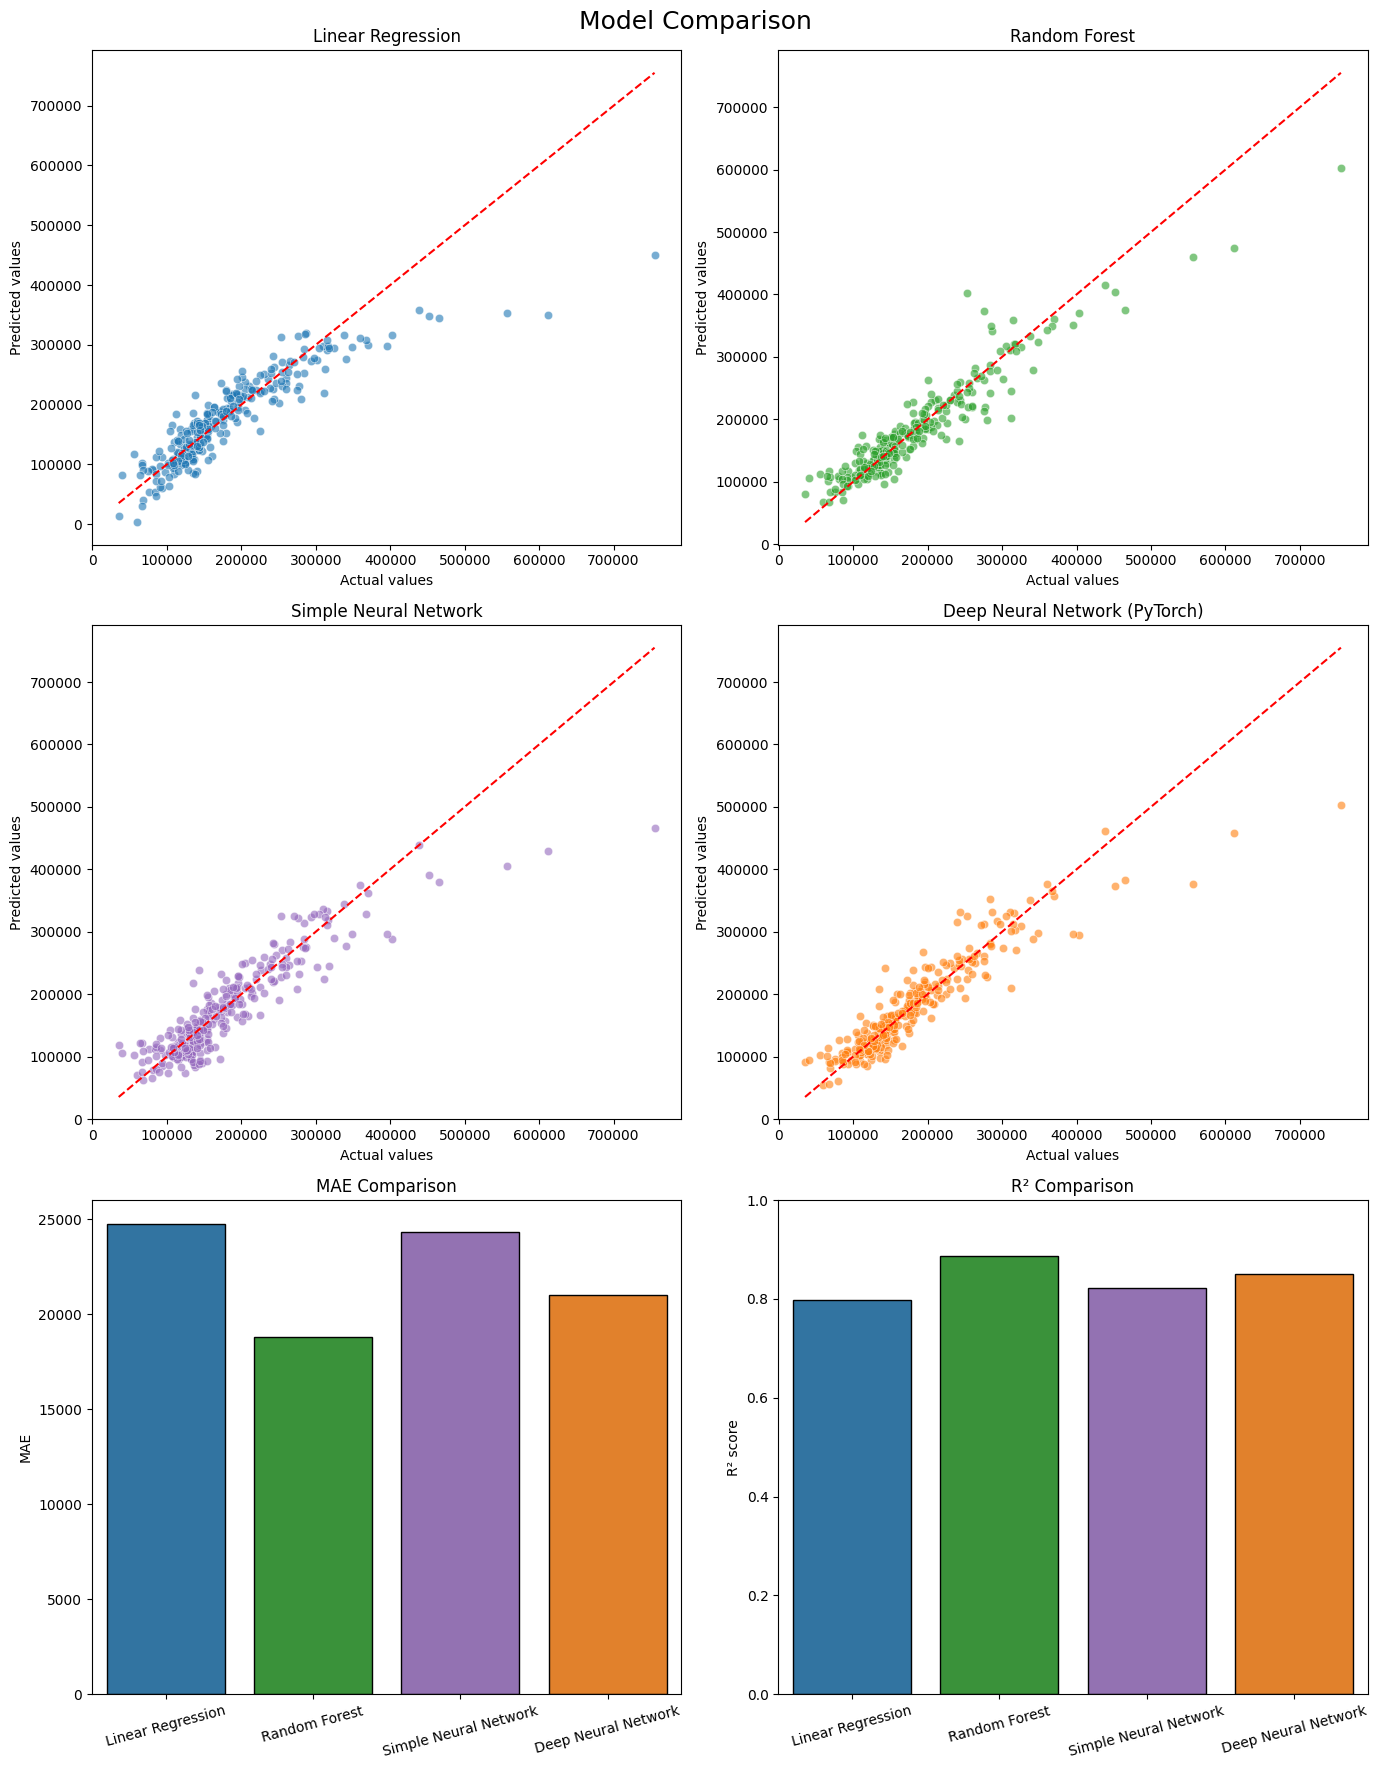

In [14]:
# Visual comparison of all models
lr_mae = mean_absolute_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_forest_pred)
nn_mae = mean_absolute_error(y_test, y_nn_pred)
dnn_mae = mean_absolute_error(y_test, y_dnn_pred)

lr_r2 = r2_score(y_test, y_pred)
rf_r2 = r2_score(y_test, y_forest_pred)
nn_r2 = r2_score(y_test, y_nn_pred)
dnn_r2 = r2_score(y_test, y_dnn_pred)

line_min, line_max = y_test.min(), y_test.max()

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

sns.scatterplot(ax=axes[0][0], x=y_test, y=y_pred, alpha=0.6)
axes[0][0].plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--")
axes[0][0].set_title("Linear Regression")
axes[0][0].set_xlabel("Actual values")
axes[0][0].set_ylabel("Predicted values")

sns.scatterplot(ax=axes[0][1], x=y_test, y=y_forest_pred, alpha=0.6, color="tab:green")
axes[0][1].plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--")
axes[0][1].set_title("Random Forest")
axes[0][1].set_xlabel("Actual values")
axes[0][1].set_ylabel("Predicted values")

sns.scatterplot(ax=axes[1][0], x=y_test, y=y_nn_pred, alpha=0.6, color="tab:purple")
axes[1][0].plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--")
axes[1][0].set_title("Simple Neural Network")
axes[1][0].set_xlabel("Actual values")
axes[1][0].set_ylabel("Predicted values")

sns.scatterplot(ax=axes[1][1], x=y_test, y=y_dnn_pred, alpha=0.6, color="tab:orange")
axes[1][1].plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--")
axes[1][1].set_title("Deep Neural Network (PyTorch)")
axes[1][1].set_xlabel("Actual values")
axes[1][1].set_ylabel("Predicted values")

mae_df = pd.DataFrame(
    {
        "Model": [
            "Linear Regression",
            "Random Forest",
            "Simple Neural Network",
            "Deep Neural Network",
        ],
        "MAE": [lr_mae, rf_mae, nn_mae, dnn_mae],
    }
)
sns.barplot(
    ax=axes[2][0],
    data=mae_df,
    x="Model",
    y="MAE",
    palette=["tab:blue", "tab:green", "tab:purple", "tab:orange"],
    edgecolor="black",
    hue="Model",
    legend=False
)
axes[2][0].set_title("MAE Comparison")
axes[2][0].set_xlabel("")
axes[2][0].set_ylabel("MAE")
axes[2][0].tick_params(axis="x", rotation=15)

r2_df = pd.DataFrame(
    {
        "Model": [
            "Linear Regression",
            "Random Forest",
            "Simple Neural Network",
            "Deep Neural Network",
        ],
        "R2": [lr_r2, rf_r2, nn_r2, dnn_r2],
    }
)
sns.barplot(
    ax=axes[2][1],
    data=r2_df,
    x="Model",
    y="R2",
    palette=["tab:blue", "tab:green", "tab:purple", "tab:orange"],
    edgecolor="black",
    hue="Model",
    legend=False
)
axes[2][1].set_title("R² Comparison")
axes[2][1].set_xlabel("")
axes[2][1].set_ylabel("R² score")
axes[2][1].set_ylim(0, 1)
axes[2][1].tick_params(axis="x", rotation=15)

fig.suptitle("Model Comparison", fontsize=18)
plt.tight_layout()
plt.show()

In [16]:
# submit the random forest model
feature_medians = numeric_features.median()
test_numeric = test_df.select_dtypes(include=["float64", "int64"])
test_numeric_filled = test_numeric.fillna(feature_medians)

selected_features = list(top_correlations.keys())
X_test_submission = test_numeric_filled[selected_features]

rf_submission_pred = model.predict(X_test_submission)

submission_df = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": rf_submission_pred,
})

submission_path = "random_forest_submission.csv"
submission_df.to_csv(submission_path, index=False)
print(f"Saved submission file to {submission_path}")
print("Size", submission_df.shape)
submission_df.head()

Saved submission file to random_forest_submission.csv
Size (1459, 2)


,Id,SalePrice
0,1461,125629.33
1,1462,149830.00
2,1463,170756.52
3,1464,192160.00
4,1465,219783.24
